In [25]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, 
                           n_informative=1, n_clusters_per_class=1, random_state = 42)

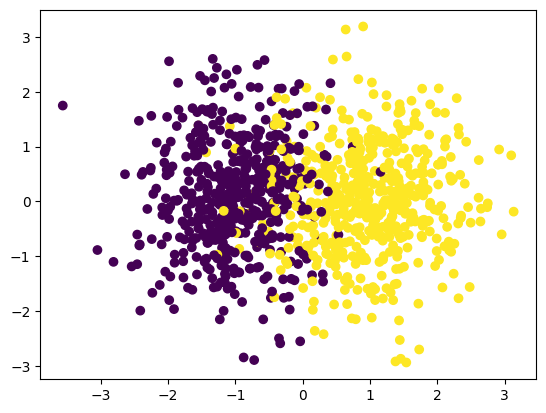

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

## Split Dataset into Train/Test

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state = 42)
X_train.shape

(900, 2)

In [28]:
import numpy as np

def _sigmoid(z):
    return 1.0/(1 + np.exp(-(z)))

def _loss(y, y_hat):
    loss = -np.mean(y * (np.log(y_hat)) + (1 - y) * np.log(1-y_hat))
    return loss


class LogisticReg:
    
    def __init__(self, lr = 0.01, epochs = 100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    # training step
    def fit(self, X, y, debug = False):
        
        # M is the size of samples
        # N is the size of features
        m, n = X.shape
        
        self.weights = np.zeros((n, 1))
        self.bias = 0
        
        # for safety
        y = y.reshape(m, 1)
        
        # save the hist, for debug information
        losses = list()
        b_list = list()
        w_list = list()
        
        # gradient loop
        for epoch in range(self.epochs):
            
            # calculate prediction
            y_hat = _sigmoid(np.dot(X, self.weights) + self.bias)
            
            # save current loss J = L
            loss = _loss(y, y_hat)
            losses.append(loss)
            
            # calculate gradient
            dw = (1/m) * np.dot(X.T, (y_hat - y))
            db = (1/m) * np.sum((y_hat - y))
            
            # update params
            self.weights = self.weights - self.lr * dw            
            self.bias = self.bias - self.lr * db
            
            # save the params
            w_list.append(self.weights)
            b_list.append(self.bias)
            
            # print
            if (debug and epoch % 100 == 0):
                print(f"epoch: {epoch}, loss: {np.round(loss, 4)}")
            
        return self.weights, self.bias, losses, b_list, w_list    
        
    # the prediction
    def predict(self, X):
        preds = _sigmoid(np.dot(X, self.weights) + self.bias)
        
        pred_class = [1 if i > 0.5 else 0 for i in preds]
        
        return np.array(pred_class)

In [29]:
model = LogisticReg(lr = 0.01, epochs = 500)
w, b, loss, b_list, w_list = model.fit(X_train, y_train, debug = True)
w, b

epoch: 0, loss: 0.6931
epoch: 100, loss: 0.5242
epoch: 200, loss: 0.4368
epoch: 300, loss: 0.3856
epoch: 400, loss: 0.3524


(array([[ 1.26123885],
        [-0.06717114]]),
 0.03228546020680265)

In [30]:
w_list = np.array(w_list)

## Plot the results

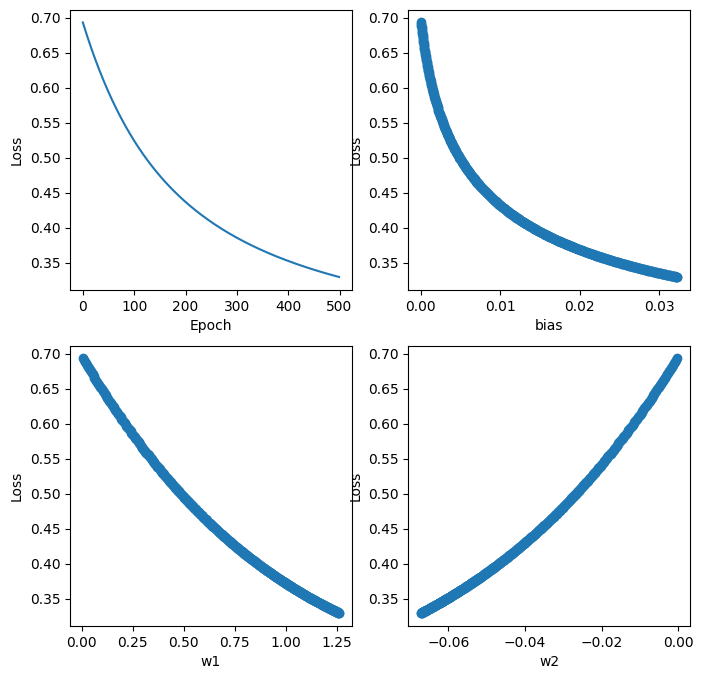

In [31]:
plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(2, 2, 2)
plt.scatter(b_list, loss)
plt.xlabel("bias")
plt.ylabel("Loss")

plt.subplot(2, 2, 3)
plt.scatter(w_list[:, 0], loss)
plt.xlabel("w1")
plt.ylabel("Loss")

plt.subplot(2, 2, 4)
plt.scatter(w_list[:, 1], loss)
plt.xlabel("w2")
plt.ylabel("Loss")
plt.show()

## Accuracy

In [32]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy


print("Accuracy on  test: ", accuracy(y_test, y_hat=model.predict(X_test)))

Accuracy on  test:  0.93


In [33]:
print("Accuracy on  train: ", accuracy(y_train, y_hat=model.predict(X_train)))

Accuracy on  train:  0.9088888888888889


# Sklearn

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [35]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [36]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [37]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [38]:
X = iris['data'][:, 3:] # petal width
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [39]:
y = (iris['target'] == 2).astype(int)

# 1 if the class is Virginica, else 0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
model = LogisticRegression(random_state = 42)

# train the model
model.fit(X, y)

LogisticRegression(random_state=42)

In [41]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = model.predict_proba(X_new)

y_proba.shape

(1000, 2)

In [42]:
y_proba[0]

array([9.99249051e-01, 7.50949397e-04])

In [45]:
np.sum(y_proba[10])

1.0

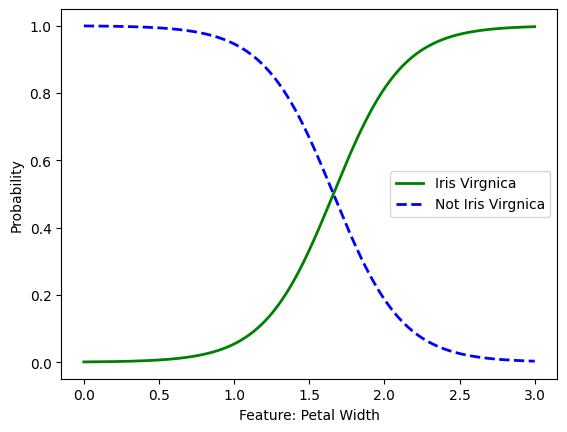

In [46]:
plt.plot(X_new, y_proba[:, 1], "g-", linewidth = 2, label = "Iris Virgnica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth = 2, label = "Not Iris Virgnica")
plt.xlabel("Feature: Petal Width")
plt.ylabel("Probability")
plt.legend()
plt.show()

# On Full Dataset

In [47]:
X = iris["data"]
y = iris["target"]

In [48]:
model = LogisticRegression(random_state = 42, max_iter = 200)
model.fit(X, y)

LogisticRegression(max_iter=200, random_state=42)

In [49]:
model.score(X, y)

0.9733333333333334

# Precition

In [50]:
# this is a new observation
X_test = np.array([[5, 2.2, 4.6, 1.7]])

# lets to predict this new instance
prediction = model.predict(X_test)
print(f"The predicted class is {prediction}")

The predicted class is [2]
